# Setting up the Environment and Loading Data 

In [5]:
pip install prince==0.13.1


Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

**The Heart Disease dataset** from the UCI Machine Learning Repository is a widely used resource for analyzing cardiovascular health data. It comprises information collected from various medical centers, with the Cleveland database, with the goal of predicting the presence of heart disease. Each row represents a patient, and the features capture various health indicators and test results. The target variable (target) indicates whether the patient has heart disease (1) or does not (0).

**Key Features:**

 * Attributes: The complete dataset has 76 attributes, though only 14 are commonly used for predictive modeling.
 * Age: Age of the patient in years.
 * Sex: Gender of the patient (1 = male, 0 = female).
 * cp (Chest Pain Type):
      * 0: Typical angina (chest pain related to decreased blood supply to the heart)
      * 1: Atypical angina
      * 2: Non-anginal pain
      * 3: Asymptomatic (no chest pain)

 * trestbps (Resting Blood Pressure): Resting blood pressure in mm Hg on admission to the hospital.
 * chol (Cholesterol): Serum cholesterol in mg/dL.
 * fbs (Fasting Blood Sugar): Fasting blood sugar > 120 mg/dL (1 = true, 0 = false).
 * restecg (Resting Electrocardiographic Results):
     * 0: Normal
     * 1: ST-T wave abnormality
     * 2: Left ventricular hypertrophy
       
 * thalach (Maximum Heart Rate Achieved): The highest heart rate achieved during exercise testing.
 * exang (Exercise-Induced Angina): Angina induced by exercise (1 = yes, 0 = no).
 * oldpeak (ST Depression): ST depression induced by exercise relative to rest; a measure related to heart stress.
 * slope (Slope of the Peak Exercise ST Segment):
    * 0: Upsloping
    * 1: Flat
    * 2: Downsloping
      
 * ca (Number of Major Vessels Colored by Fluoroscopy): Number of major blood vessels (0-4) colored by fluoroscopy, indicating blockages.
 * thal (Thalassemia):
    * 0: Normal
    * 1: Fixed defect (no blood flow in some part of the heart)
    * 2: Reversible defect (reduced blood flow during exercise but not at rest)

 * Target Variable: Indicates the presence or absence of heart disease, with values ranging from 0 (no presence) to 4 (various levels of presence). For most studies, the target variable is converted to binary:
   * 0: No heart disease
   * 1: Presence of heart disease

In [216]:
  
# fetch dataset 
dataset=pd.read_csv('./heart.csv',delimiter=',')


# Dataset General Information

In [218]:
#Analyse des premières lignes et des infos générales
print(dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [220]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [187]:
print(dataset.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [189]:
#Checking missing values
print("Valeurs manquantes par colonne :\n", dataset.isnull().sum())

Valeurs manquantes par colonne :
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**descriptive statistics of the dataset**

In [199]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [191]:
dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Visualisation of the distribition of continuous variables

**Age Distribution**
 * The age distribution shows that both individuals with heart disease (target = 1) and those without (target = 0) are centered around 50-60 years, with a peak slightly over 60 for those without heart disease.
 * There’s a noticeable difference in the density curves: individuals with heart disease tend to have large age interval, with more younger    individuals in the 40-50 range.

   
This could indicate that age is a significant factor in heart disease, though both groups have overlapping age ranges.


**Cholesterol (chol) Distribution**
 * The cholesterol distribution displays higher cholesterol values for individuals without heart disease (target = 0), with a concentration around 200-250.
 * In contrast, individuals with heart disease have a flatter distribution, with some even reaching very high cholesterol levels over 400.

This may suggest that cholesterol level differences are related to heart disease presence, but the overlap indicates it's not a standalone predictor.



**Oldpeak Distribution**
 * It is highly skewed to the left towards lower values, especially for individuals without heart disease (target = 0).
 * Individuals with heart disease (target = 1) tend to have a wider range of oldpeak values (from 2 to 6), suggesting that higher oldPeak is more common in this group.
This variable could be an important indicator in distinguishing individuals with heart disease, as the target groups show some separation in their distribution.

**Trestbps Distribution**
 * the distribution is centered around 120-140 for both groups, but individuals with heart disease tend to have a slightly higher resting blood pressure on average.
 Trestbs is not a pertinent predictor

**thalach Distribution**

 * People without heart disease (target = 0) tend to have lower values of thalach, peaking around the range of 130–160 bpm.
 * People with heart disease (target = 1) generally have higher values of thalach, with many values above 140 bpm and peaking slightly higher in the 140–170 bpm range.

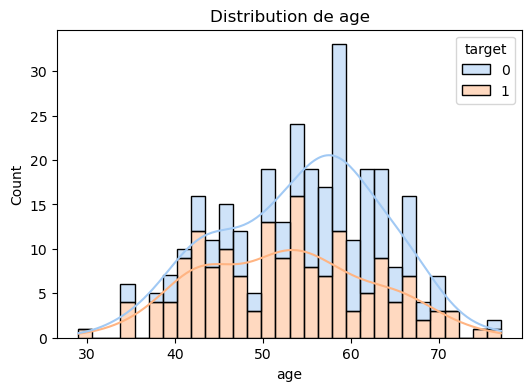

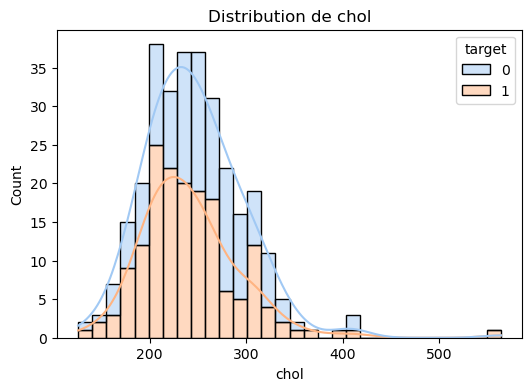

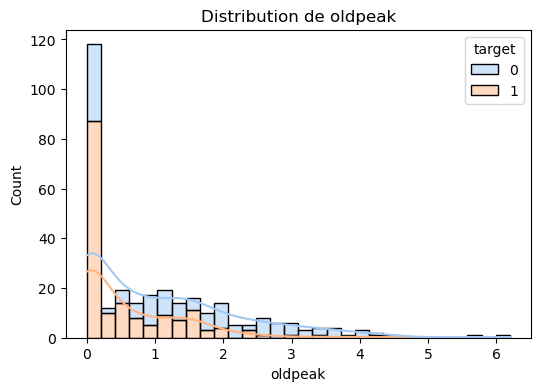

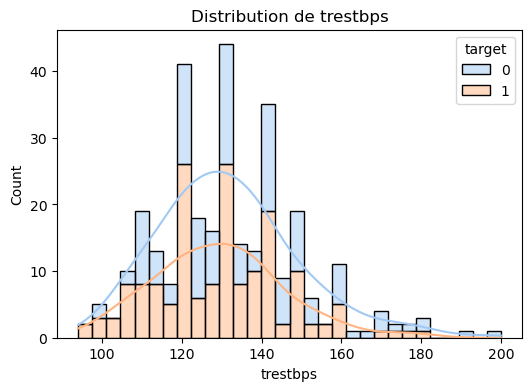

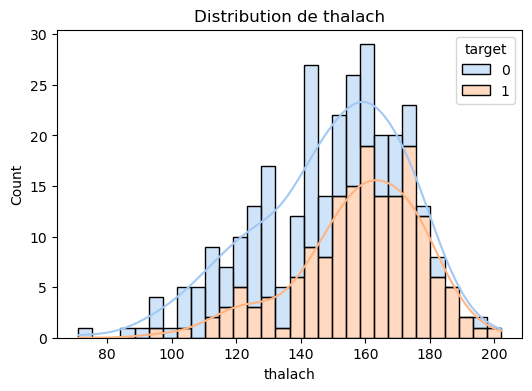

In [240]:

continuous_features = list(set(['age','trestbps','chol','thalach','oldpeak']))

for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=dataset, x=col, hue="target",multiple="stack",palette='pastel', kde=True, bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.show()

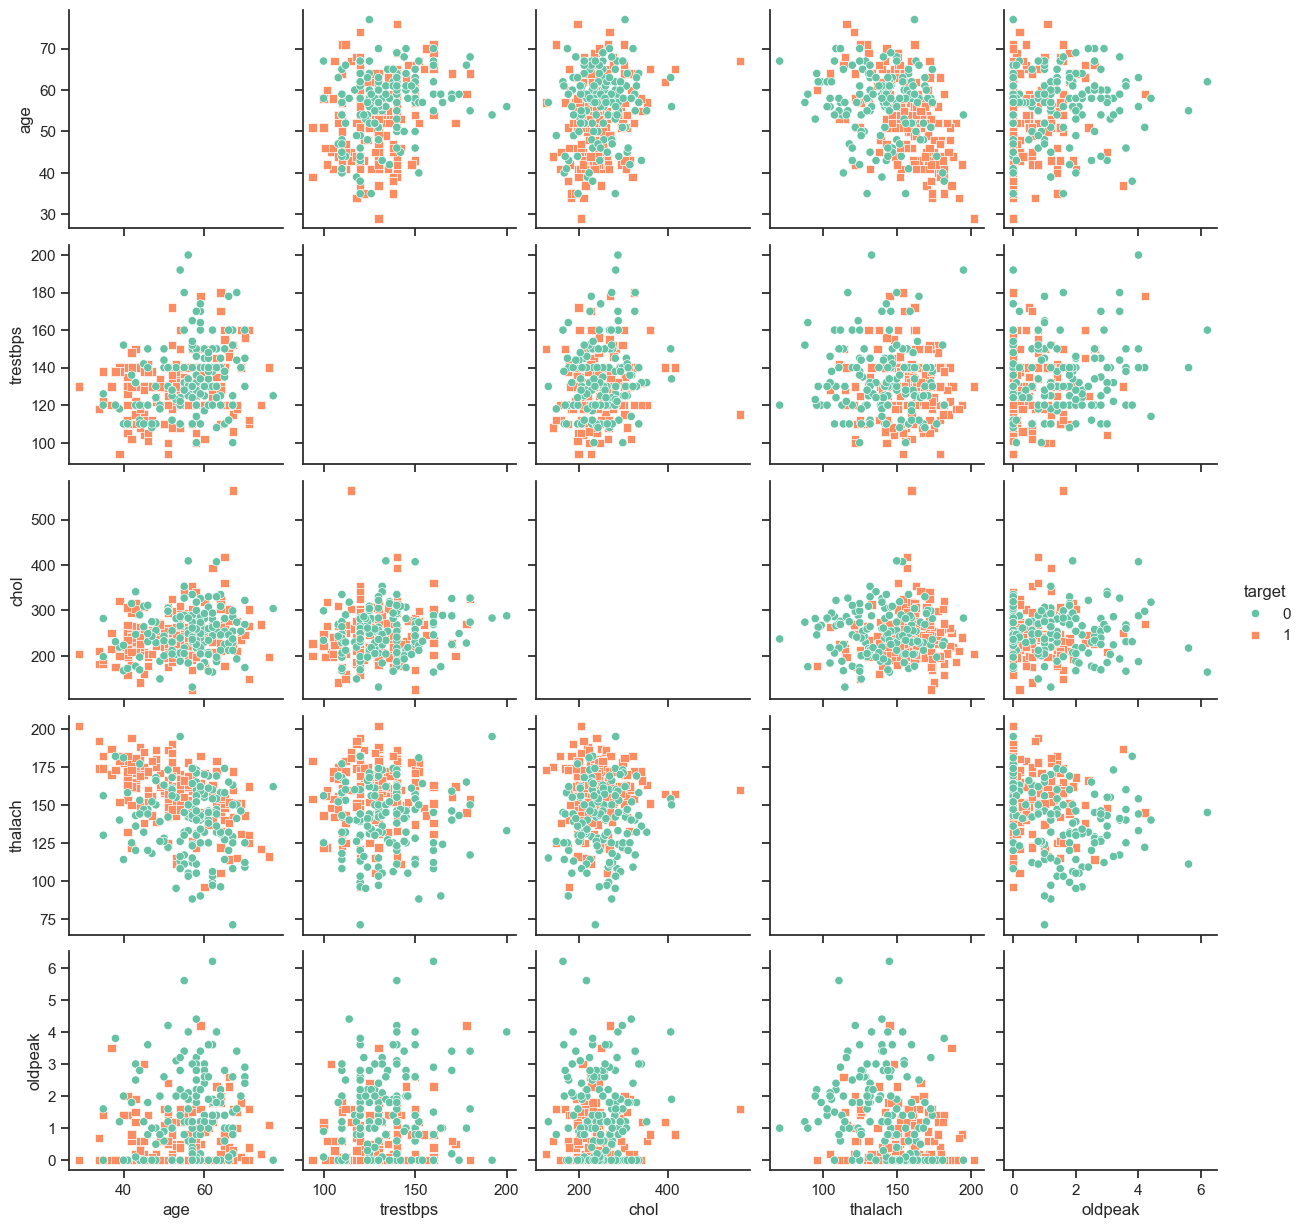

In [256]:
selected_col=['age','trestbps','chol','thalach','oldpeak','target']
sns.pairplot(dataset[selected_col], hue='target',diag_kind='none',palette='Set2', markers=['o','s'])
# parplot: creer des scatter plots pour visualiser les relations entre chaque paire de variables dans le jeu de données.
#hue permet de colorer les points du graphique en fonction des catégories d'une colonne (ici target)
#diag_kind: type de graphique à utiliser pour la diagonale de la matrice 
sns.set(style='ticks')
sns.despine()

# Visualization of the distribution of the categorical variables



**Distribution of ca by Presence of Heart Disease**

 * For patients with heart disease (target = 1), most have ca = 0, meaning they have no major vessels blocked or colored by fluoroscopy. As ca values increase (indicating more blocked vessels), the count of patients with heart disease decreases significantly.

**Distribution of cp by Presence of Heart Disease**
The chest pain type (cp) varies noticeably between the two groups:
 * cp = 0 (typical angina) is much more common in patients without heart disease (target = 0).
 * cp = 1, cp = 2, and cp = 3 are more common in patients with heart disease (target = 1), especially cp = 2.

 Higher values of cp are associated with a higher likelihood of heart disease, while lower cp values are more common in patients without heart disease.
 
 
**Distribution of exang by Presence of Heart Disease**

 * Most patients with heart disease (target = 1) have exang = 0, meaning they do not experience exercise-induced angina.
 * The absence of exercise-induced angina (exang = 0) is associated with a higher likelihood of heart disease in this dataset, which may seem counterintuitive.

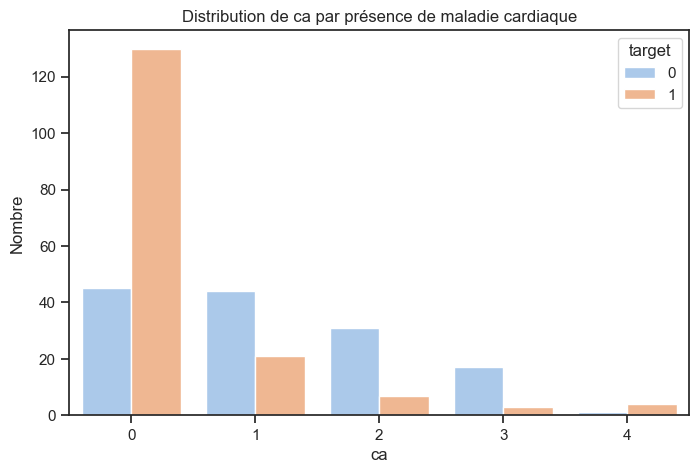

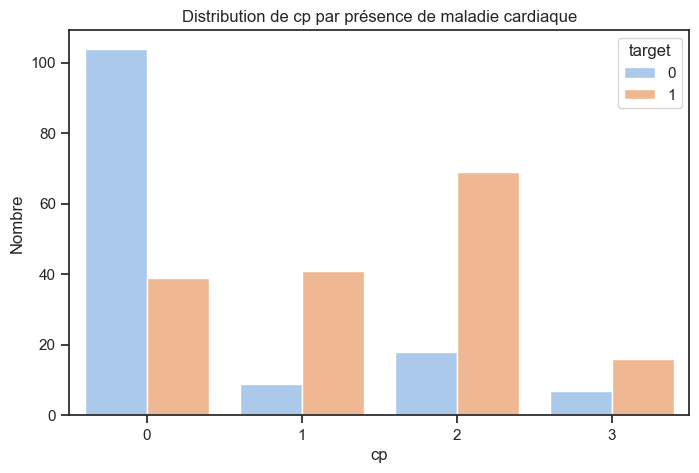

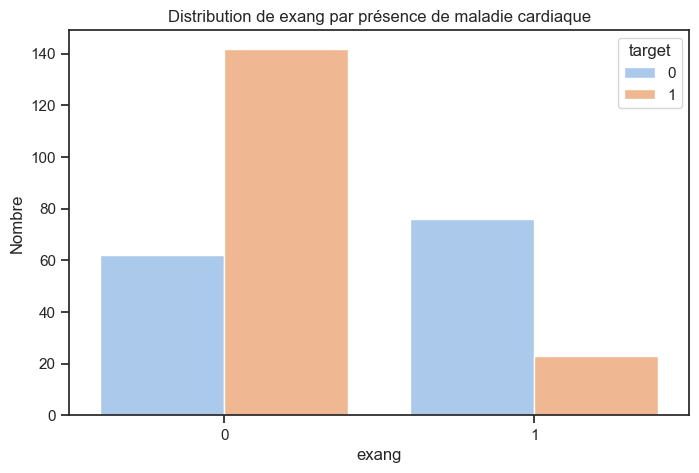

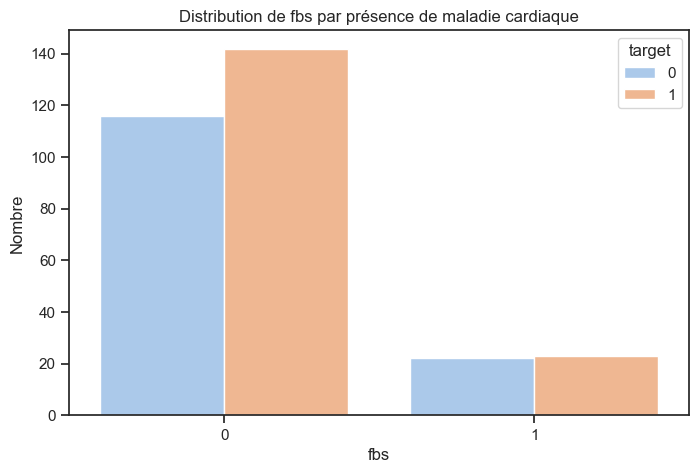

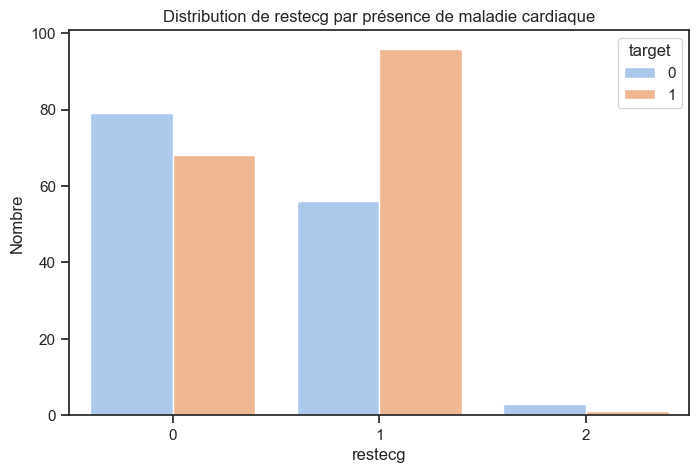

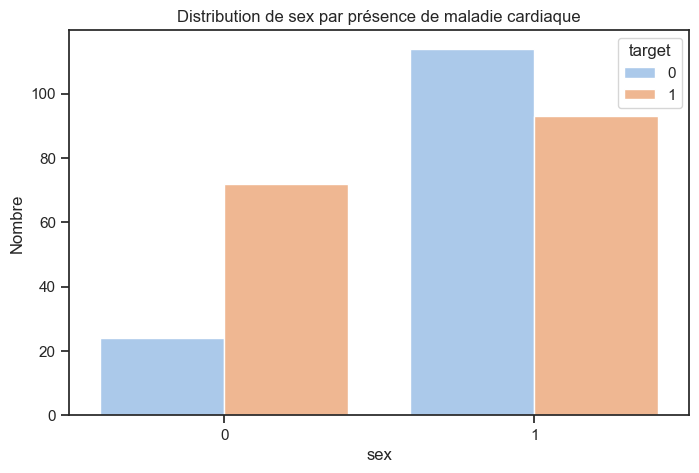

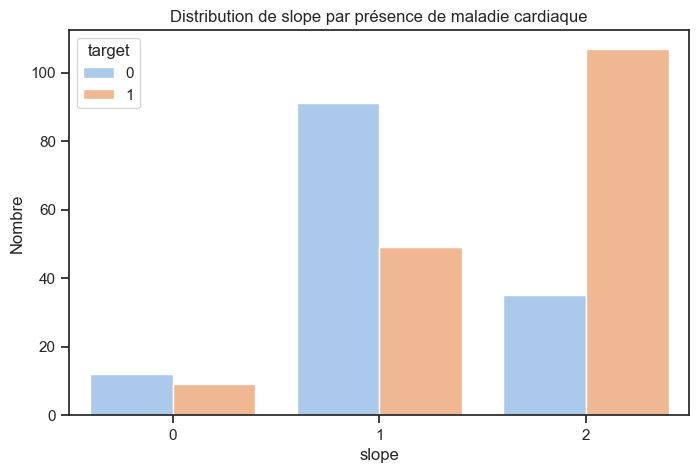

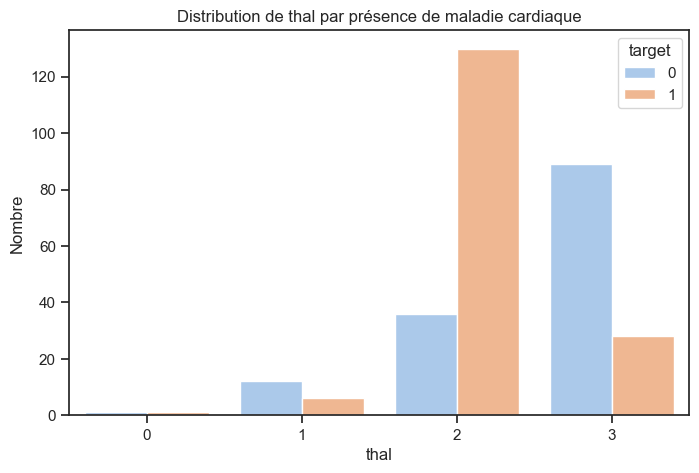

In [275]:
# Create the list of categorical features for further use in prepare charts

categorical_features = list(set(dataset.columns) -set(continuous_features)-set(['target']))
categorical_features.sort()


for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataset, x=col, hue='target',palette='pastel')
    plt.title(f'Distribution de {col} par présence de maladie cardiaque')
    plt.xlabel(col)
    plt.ylabel('Nombre')
    plt.show()


**Confusion Matrix**

The correlation matrix provides insights into the relationships between different variables in the heart disease dataset:

**Target Correlations:**

 * The target variable has the highest positive correlation with cp (chest pain type) at **0.43** and thalach (maximum heart rate achieved) at **0.42**.
 * It shows moderate negative correlations with exang (exercise-induced angina) at **-0.44**, oldpeak (ST depression induced by exercise) at **-0.43**, and ca (number of major vessels) at -0.39. These suggest that lower exang, oldpeak, and ca values may indicate a higher probability of heart disease presence in this dataset.

**Strong Positive Correlations Between Features**
* **slope** and **cp** have a correlation of **0.39**, indicating that the slope of the peak exercise ST segment is somewhat related to the type of chest pain experienced.


**Negative Correlations**

  * **thalach** has a moderate negative correlation with **age** at **-0.40** and with **exang** at **-0.38**. Older individuals or those who experience exercise-induced angina tend to have lower maximum heart rates.
 
  * **oldpeak** and **slope** have a negative correlation (-0.58),so a higher oldpeak is associated with a less steep, a flatter slope during exercise can be a sign of heart stress or problems.


**Conclusion**
   * For PCA, focusing on variables with higher correlations (either positive or negative) with the **target** variable may enhance interpretability, these features are likely more important in predicting heart disease.
     
   * Features like **cp**, **thalach**, **exang**, **oldpeak**, **ca**, and **slope** may play a more significant role in forming principal components, as they explain more of the variance related to the presence of heart disease. 
     at correlated features.

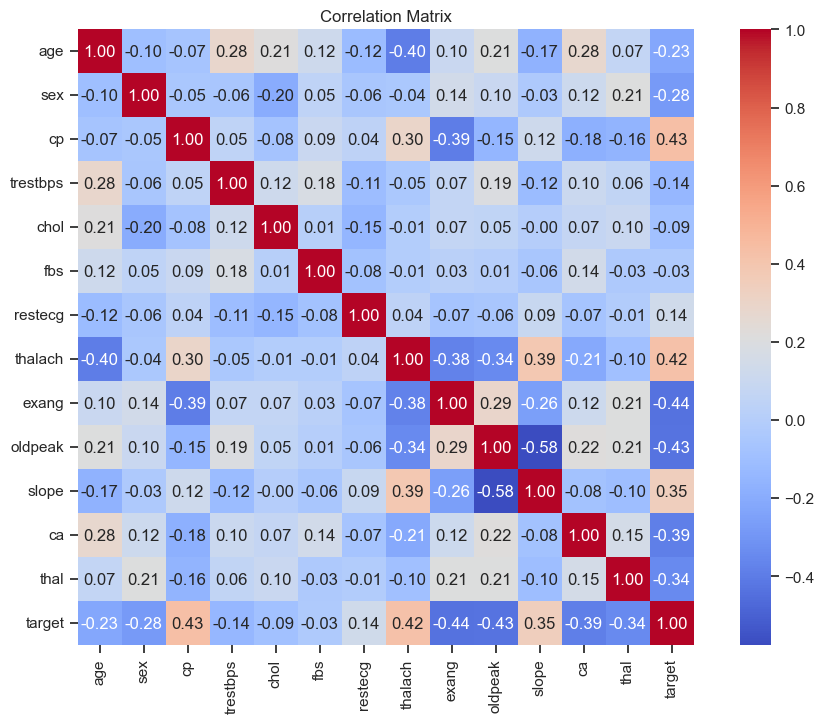

In [285]:
plt.figure(figsize=(12, 8))

# Heatmap of the correlation matrix
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Title
plt.title('Correlation Matrix')
plt.show()